In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os, glob
import galsim
from tqdm import tqdm
from censai.data.kappa_tng import decode_train, decode_all, decode_physical_model_info
from censai.definitions import log_10
# from astropy.visualization import ImageNormalize, LogStretch
from matplotlib.colors import LogNorm
plt.style.use('dark_background')

In [9]:
# datapath = "/home/aadam/scratch/Censai/data/cosmos_23.5/"
datapath = "/home/aadam/scratch/Censai/data/hkappa128_TNG100_trainset/"
files = glob.glob(os.path.join(datapath, "*.tfrecords"))
files = tf.data.Dataset.from_tensor_slices(files)
dataset = files.interleave(lambda x: tf.data.TFRecordDataset(x, compression_type="GZIP"), block_length=1, num_parallel_calls=tf.data.AUTOTUNE).map(decode_all)

In [10]:
for example in dataset:
    params_keys = ['kappa fov', 'kappa pixels']
    example = {key: example[key] for key in params_keys}
    break

In [11]:
example

{'kappa fov': <tf.Tensor: shape=(), dtype=float32, numpy=17.425909>,
 'kappa pixels': <tf.Tensor: shape=(), dtype=int64, numpy=128>}

In [12]:
kappas = []
einstein_radius = []
einstein_radius_init = []
rescalings = []
kappa_ids = []
kappa_max = []
kappa_min = []
kappa_max_before_rescaling = []
kappa_var = []
kappa_mean = []
i = 0
for example in tqdm(dataset):
    kappa_ids.append(example['kappa id'].numpy())
    einstein_radius.append(example['Einstein radius'].numpy())
    einstein_radius_init.append(example['Einstein radius before rescaling'].numpy())
    rescalings.append(example['rescaling factor'])
#     kappa_max.append(np.max(example['kappa']))
#     kappa_min.append(np.min(example['kappa']))
#     kappa_max_before_rescaling.append(np.max(example['kappa'])/example['rescaling factor'].numpy())
#     kappa_var.append(np.std(example['kappa']))
#     kappa_mean.append(np.mean(example['kappa']))
    kappas.append(example['kappa'])
    i += 1
    if i == 10000:
        break

9999it [00:08, 1192.61it/s]


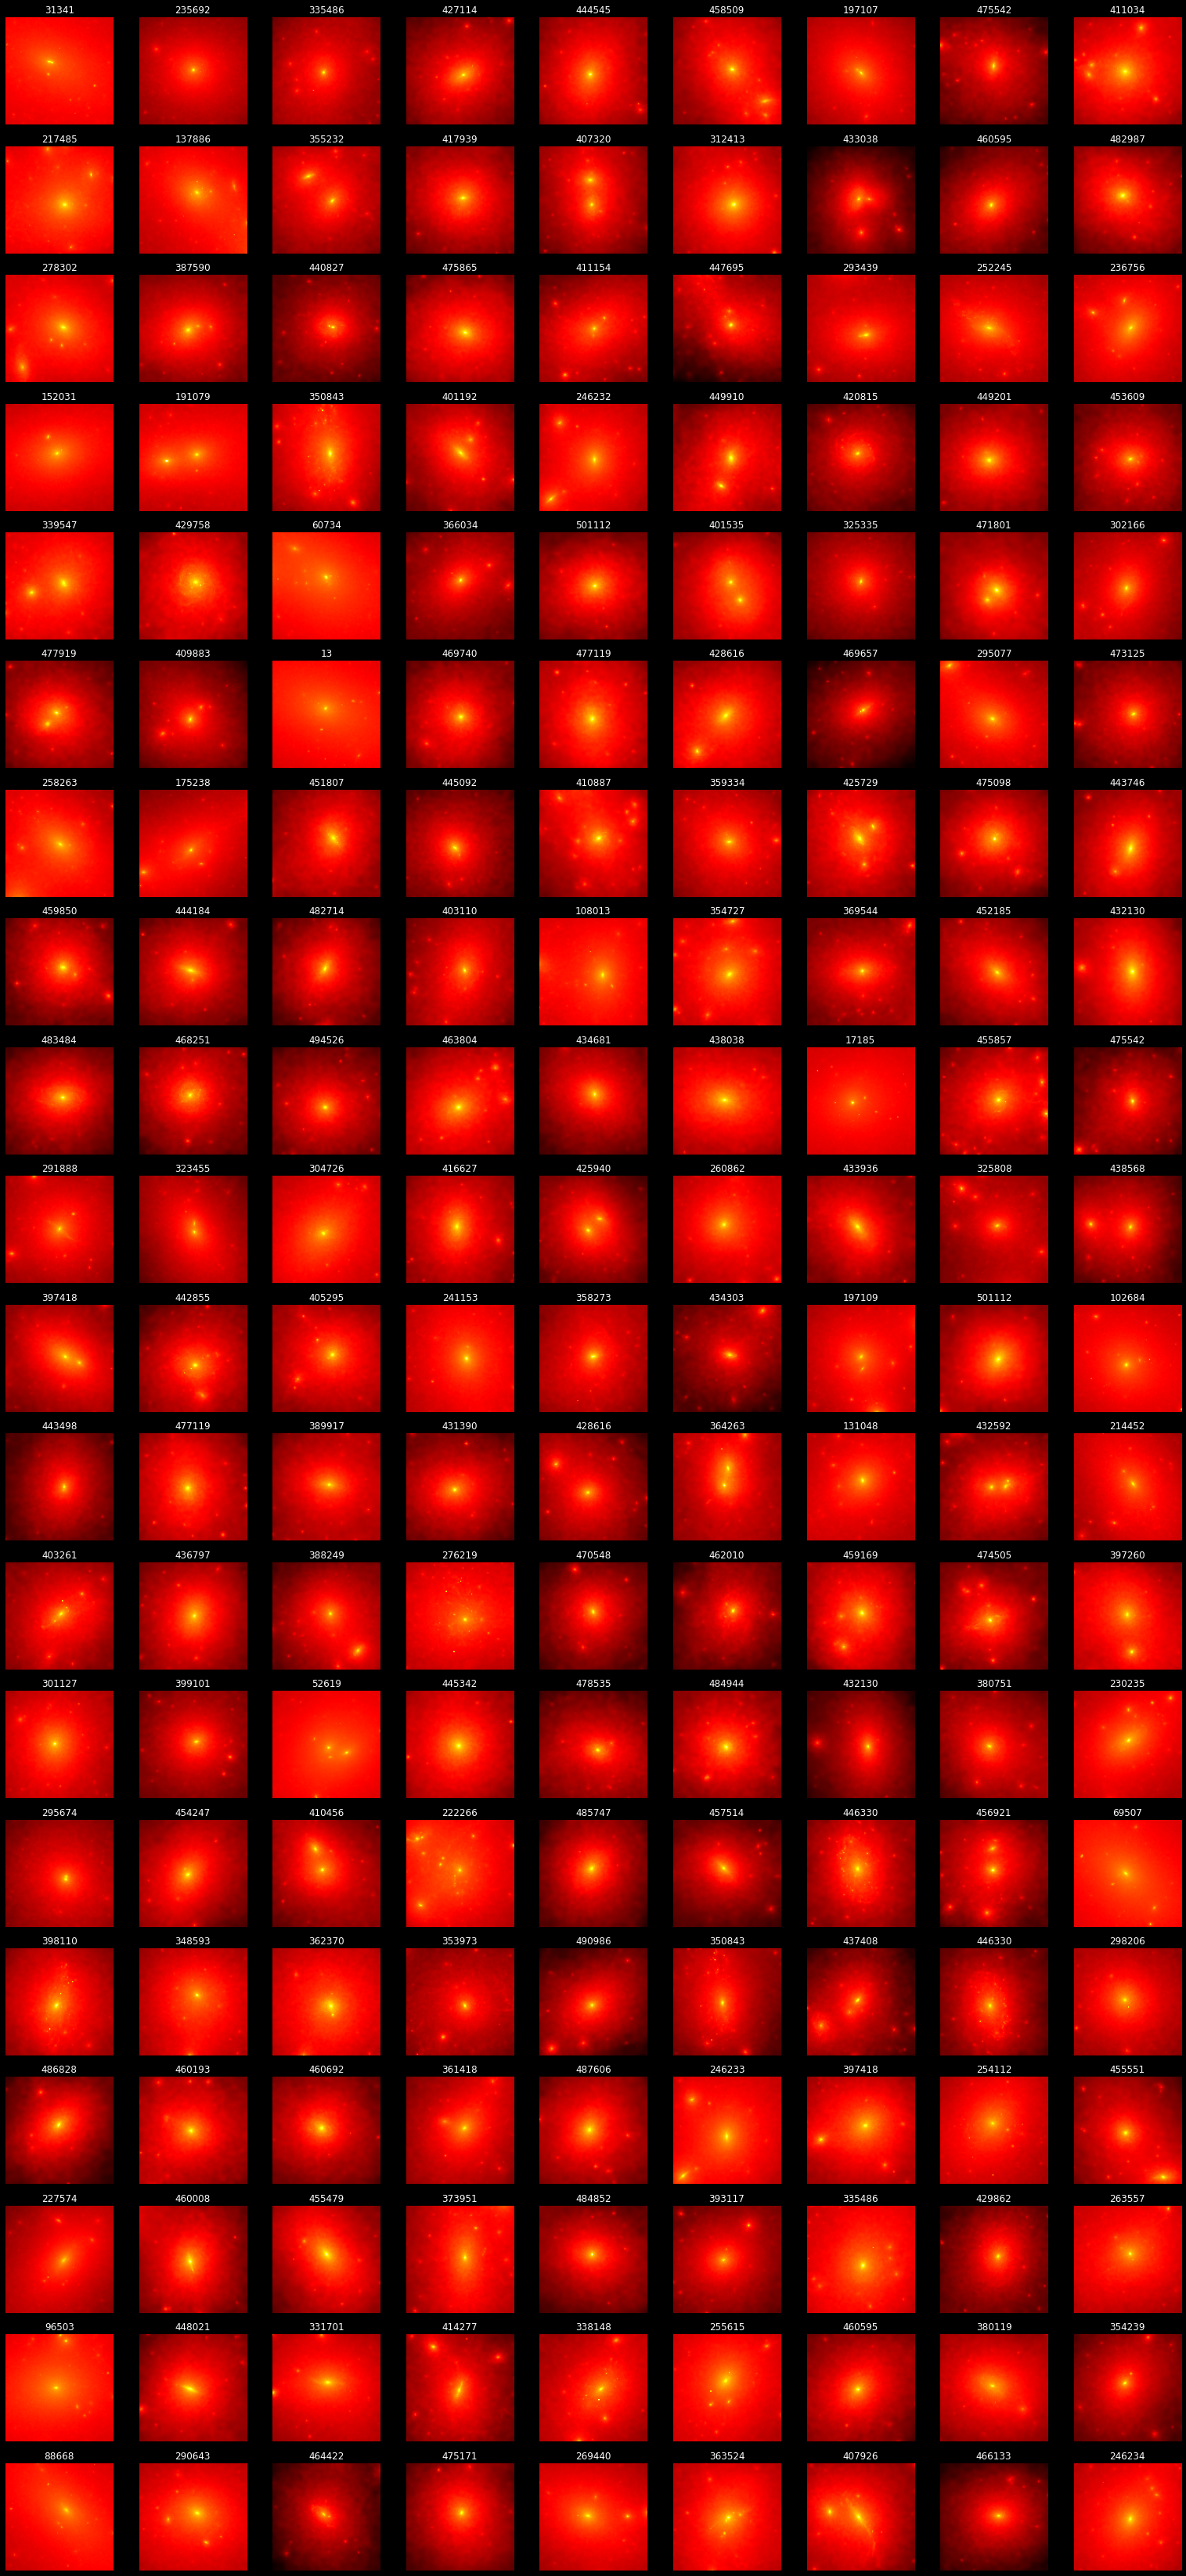

In [13]:
len_y = 20
len_x = 9
fig, axs = plt.subplots(len_y, len_x, figsize=(3 * len_x, 3 * len_y))
start = 3000
for i in range(len_y):
    for j in range(len_x):
        k = i * len_x + j
        axs[i, j].imshow(kappas[k+start][..., 0], cmap="hot", norm=LogNorm(vmin=1e-2, vmax=100))
        axs[i, j].axis("off")
        axs[i, j].set_title(kappa_ids[k+start])

# plt.subplots_adjust(wspace=0, hspace=-0.05)

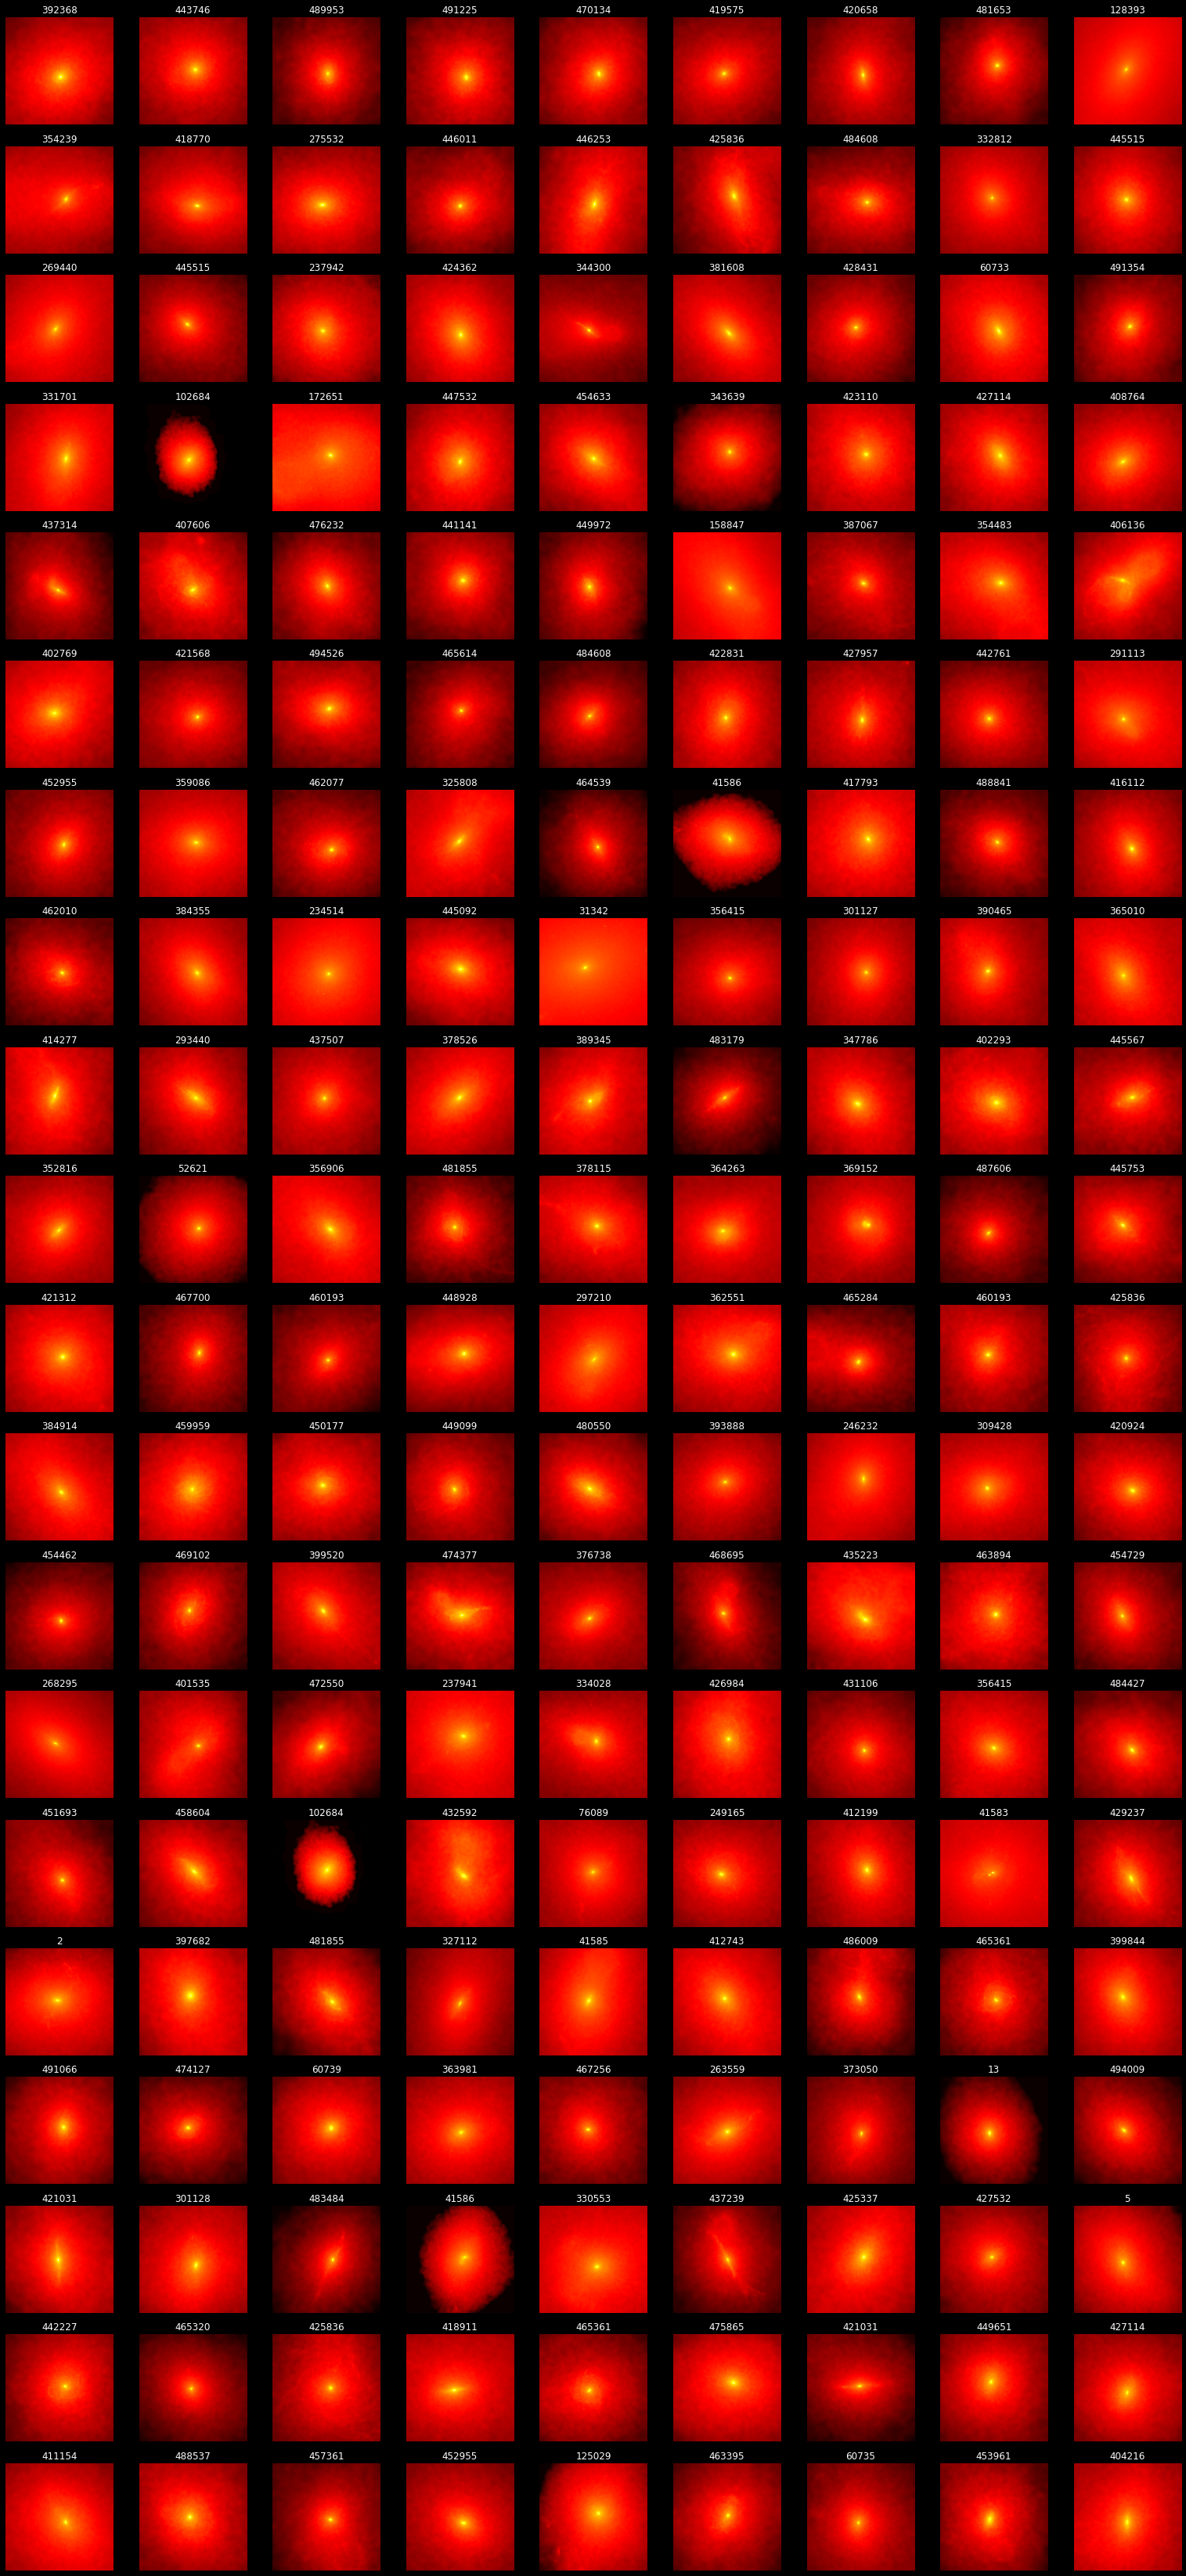

In [16]:
len_y = 20
len_x = 9
fig, axs = plt.subplots(len_y, len_x, figsize=(3 * len_x, 3 * len_y))
start = 1000
for i in range(len_y):
    for j in range(len_x):
        k = i * len_x + j
        axs[i, j].imshow(kappas[k+start][..., 0], cmap="hot", norm=LogNorm(vmin=1e-2, vmax=100))
        axs[i, j].axis("off")
        axs[i, j].set_title(kappa_ids[k+start])

# plt.subplots_adjust(wspace=0, hspace=-0.05)